# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [7]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

#reading file
file_path = '/content/drive/My Drive/ca_ssi_adult_odp_2023.csv'
data = pd.read_csv(file_path)

#number of rows and columns
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])




Mounted at /content/drive
Number of rows: 6395
Number of columns: 19


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [8]:
# Unique values in each column
unique_counts = data.nunique()

# Number of unique values per column
print("Number of unique values per column:")
print(unique_counts)

# Column with the greatest number of unique values
most_unique_col = unique_counts.idxmax()
most_unique_count = unique_counts.max()

print(f"\nColumn with the most unique values: {most_unique_col} ({most_unique_count} unique values)")

# If the column with the most unique values is an identifier, find the next most diverse column
if most_unique_count == len(data):
    next_most_unique_col = unique_counts.nlargest(2).idxmin()
    next_most_unique_count = unique_counts.nlargest(2).iloc[-1]
    print(f"\nNext most diverse column: {next_most_unique_col} ({next_most_unique_count} unique values)")


Number of unique values per column:
Year                                   1
State                                  1
County                                51
HAI                                    1
Operative_Procedure                   58
Facility_ID                          328
Facility_Name                        326
Hospital_Category_RiskAdjustment       2
Facility_Type                          6
Procedure_Count                      870
Infections_Reported                   72
Infections_Predicted                 734
SIR                                  451
SIR_CI_95_Lower_Limit                166
SIR_CI_95_Upper_Limit               1203
Comparison                             3
Met_2020_Goal                          2
SIR_2015                             454
Notes                                  1
dtype: int64

Column with the most unique values: SIR_CI_95_Upper_Limit (1203 unique values)


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [9]:
# Columns where all values are the same
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

if constant_columns:
    print("Columns where all values are the same:")
    print(constant_columns)
else:
    print("No columns have the same value for every row.")


Columns where all values are the same:
['Year', 'State', 'HAI', 'Notes']


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

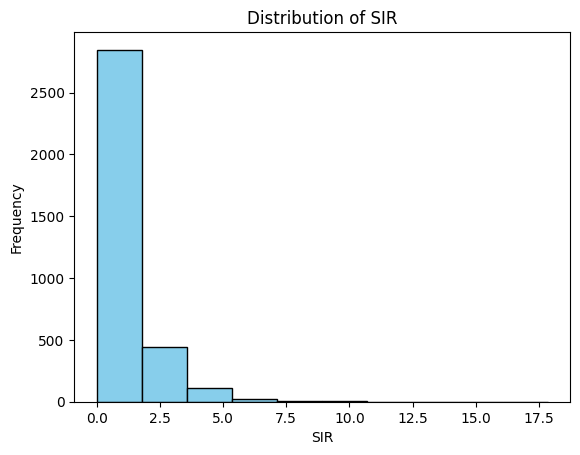

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
# Numeric column
numeric_column = 'SIR'
file_path = '/content/drive/My Drive/ca_ssi_adult_odp_2023.csv'
data = pd.read_csv(file_path)
# Plot the histogram
plt.figure
plt.hist(data[numeric_column], color='skyblue', edgecolor='black')
plt.title(f'Distribution of {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.show()



### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [12]:
from scipy.stats import zscore

# Calculate Z-scores for the 'Infections_Reported' column
z_scores = zscore(data['Infections_Reported'])

# Identify outliers (typically with Z-scores > 3 or < -3)
outliers = data[abs(z_scores) > 3]

# Display outliers
print("Outliers detected:")
print(outliers)


Outliers detected:
    Year       State County                             HAI  \
0   2023  California    NaN  Surgical Site Infections (SSI)   
3   2023  California    NaN  Surgical Site Infections (SSI)   
5   2023  California    NaN  Surgical Site Infections (SSI)   
6   2023  California    NaN  Surgical Site Infections (SSI)   
9   2023  California    NaN  Surgical Site Infections (SSI)   
10  2023  California    NaN  Surgical Site Infections (SSI)   
13  2023  California    NaN  Surgical Site Infections (SSI)   
18  2023  California    NaN  Surgical Site Infections (SSI)   
21  2023  California    NaN  Surgical Site Infections (SSI)   
25  2023  California    NaN  Surgical Site Infections (SSI)   
26  2023  California    NaN  Surgical Site Infections (SSI)   

                                  Operative_Procedure  Facility_ID  \
0                     STATE OF CALIFORNIA POOLED DATA          NaN   
3   STATE OF CALIFORNIA POOLED DATA - Bile duct, l...          NaN   
5   STATE OF C



---



## Submitting Your Work

Submit your work as usual.